In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
%pip install openpyxl

#importing necessary libraries

### Importing relevant dataset (taken from EMA Energy Statistics)

In [9]:
energy_load_by_sector = pd.read_excel('Electricity Consumption by Sub-Sector (Total).xlsx')
energy_load_by_sector

,year,sector,sub_sector,consumption_GWh
0,2005,Commerce and Services-related,Accommodation and Food Services,1031.3
1,2005,Commerce and Services-related,Commerce and Services-related,13075.6
2,2005,Commerce and Services-related,Financial and Insurance Activities,1291.9
3,2005,Commerce and Services-related,Information and Communications,667.2
4,2005,Commerce and Services-related,Other Commerce and Services-related,3612.7
...,...,...,...,...
303,2020,Overall,Overall,50779.6
304,2021,Overall,Overall,53483.5
305,2022,Overall,Overall,26933.0
306,NaN,NaN,NaN,NaN


### Data cleaning of null/duplicated values

In [12]:
energy_load_by_sector.isnull().sum()

year               1
sector             2
sub_sector         2
consumption_GWh    2
dtype: int64

In [13]:
energy_load_by_sector.duplicated().sum()

0

In [14]:
energy_load_by_sector.dropna(thresh=4,inplace=True)
energy_load_by_sector

,year,sector,sub_sector,consumption_GWh
0,2005,Commerce and Services-related,Accommodation and Food Services,1031.3
1,2005,Commerce and Services-related,Commerce and Services-related,13075.6
2,2005,Commerce and Services-related,Financial and Insurance Activities,1291.9
3,2005,Commerce and Services-related,Information and Communications,667.2
4,2005,Commerce and Services-related,Other Commerce and Services-related,3612.7
...,...,...,...,...
301,2018,Overall,Overall,50460.9
302,2019,Overall,Overall,51730.1
303,2020,Overall,Overall,50779.6
304,2021,Overall,Overall,53483.5


In [15]:
energy_load_by_sector.sector.unique()

array(['Commerce and Services-related', 'Households',
       'Industrial-related', 'Others', 'Transport-Related', 'Overall'],
      dtype=object)

### Splitting the dataset by sector for easier analysis

In [17]:
commerce_service_energy_load = energy_load_by_sector.loc[(energy_load_by_sector['sector'] == 'Commerce and Services-related')]
commerce_service_energy_load

,year,sector,sub_sector,consumption_GWh
0,2005,Commerce and Services-related,Accommodation and Food Services,1031.3
1,2005,Commerce and Services-related,Commerce and Services-related,13075.6
2,2005,Commerce and Services-related,Financial and Insurance Activities,1291.9
3,2005,Commerce and Services-related,Information and Communications,667.2
4,2005,Commerce and Services-related,Other Commerce and Services-related,3612.7
...,...,...,...,...
275,2022,Commerce and Services-related,Information and Communications,2310.3
276,2022,Commerce and Services-related,Other Commerce and Services-related,2278.3
277,2022,Commerce and Services-related,"Professional, Scientific & Technical, Administ...",438.9
278,2022,Commerce and Services-related,Real Estate Activities,2246.2


In [840]:
households_energy_load = energy_load_by_sector.loc[(energy_load_by_sector['sector'] == 'Households')]
industrial_energy_load = energy_load_by_sector.loc[(energy_load_by_sector['sector'] == 'Industrial-related')]
transport_energy_load = energy_load_by_sector.loc[(energy_load_by_sector['sector'] == 'Transport-Related')]
others_energy_load = energy_load_by_sector.loc[(energy_load_by_sector['sector'] == 'Others')]
overall_energy_load = energy_load_by_sector.loc[(energy_load_by_sector['sector'] == 'Overall')]

In [23]:
energy_load_by_sector_excl_overall = energy_load_by_sector.loc[(energy_load_by_sector['sector'] != 'Overall')]
energy_load_by_sector_excl_overall

,year,sector,sub_sector,consumption_GWh
0,2005,Commerce and Services-related,Accommodation and Food Services,1031.3
1,2005,Commerce and Services-related,Commerce and Services-related,13075.6
2,2005,Commerce and Services-related,Financial and Insurance Activities,1291.9
3,2005,Commerce and Services-related,Information and Communications,667.2
4,2005,Commerce and Services-related,Other Commerce and Services-related,3612.7
...,...,...,...,...
283,2022,Industrial-related,Manufacturing,10230.7
284,2022,Industrial-related,Other Industrial-related,27.6
285,2022,Industrial-related,Utilities,681.1
286,2022,Others,Others,101.7


### Identifying which sector(s) contribute most to electricity demand

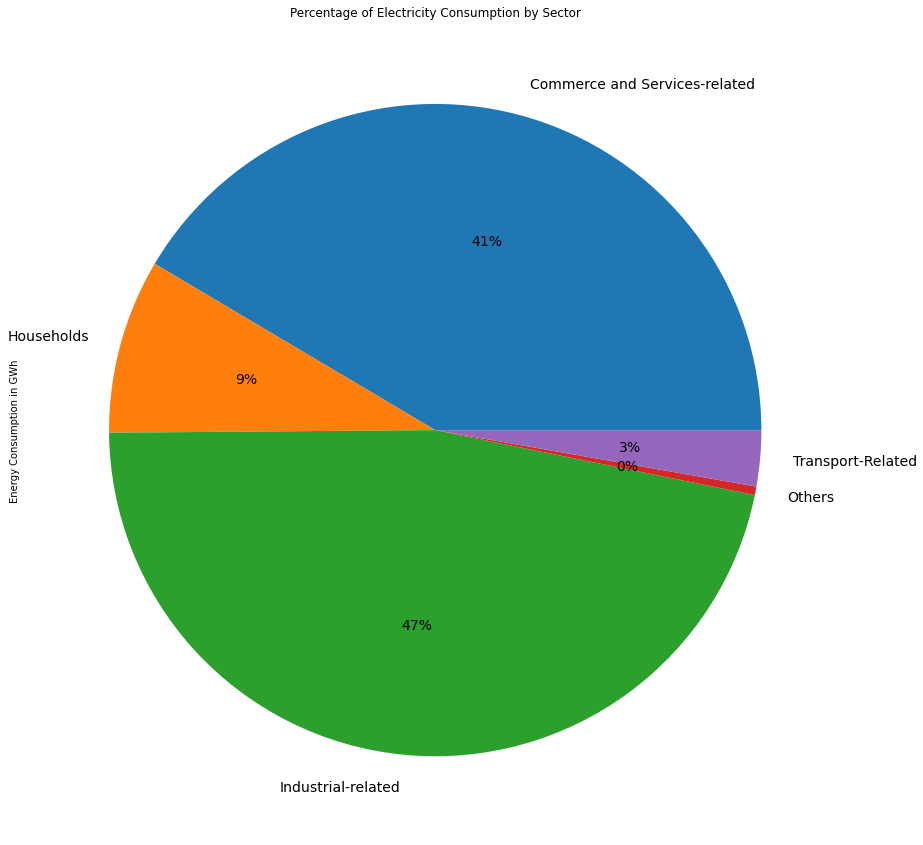

In [99]:

grouped_energy_load = energy_load_by_sector_excl_overall.groupby('sector')['consumption_GWh'].sum()
fig1, ax = plt.subplots(figsize=(15,15))
grouped_energy_load.plot(kind = 'pie',y='consumption_GWh',autopct='%1.0f%%',title = 'Percentage of Electricity Consumption by Sector', ax=ax,textprops = {'fontsize':14})
ax.set_ylabel('Energy Consumption in GWh')
fig1.set_facecolor('white')

#Historically, commerce & services and industrial-related sectors demand the most electricity.

In [727]:
print(commerce_service_energy_load['consumption_GWh'].sum())
print(households_energy_load['consumption_GWh'].sum())
print(industrial_energy_load['consumption_GWh'].sum())
print(transport_energy_load['consumption_GWh'].sum())
print(others_energy_load['consumption_GWh'].sum())
print(overall_energy_load['consumption_GWh'].sum())

584843.3
121872.59999999999
658081.1
39073.9
5970.3
752889.8


### Delving deeper into the sectors which primarily drive electricity demand

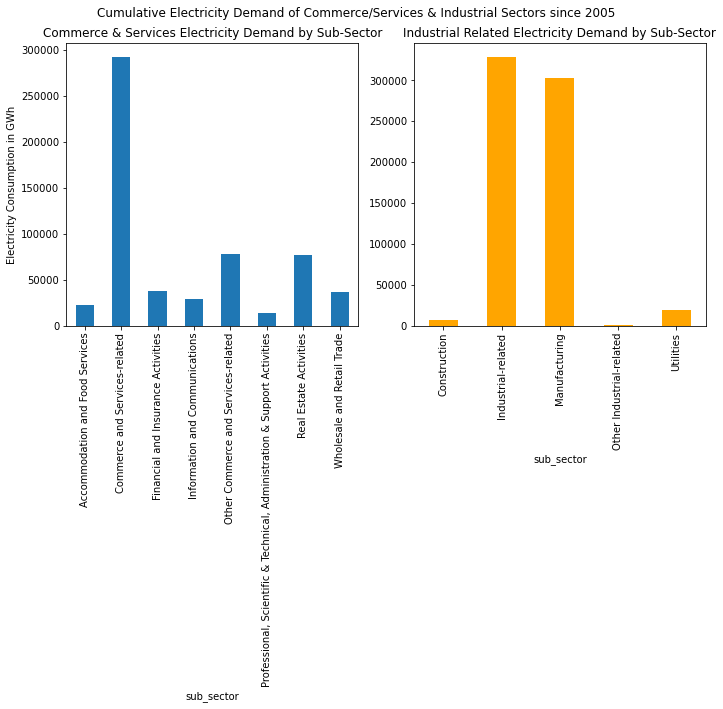

In [152]:
grouped_commerce_energy_load = commerce_service_energy_load.groupby('sub_sector')['consumption_GWh'].sum()
grouped_industrial_energy_load = industrial_energy_load.groupby('sub_sector')['consumption_GWh'].sum()
fig2, [ax1,ax2] = plt.subplots(nrows=1,ncols=2,figsize=(10,10))
grouped_commerce_energy_load.plot(kind = 'bar',y='consumption_GWh',ax=ax1)
ax1.set_title('Commerce & Services Electricity Demand by Sub-Sector')
ax1.set_ylabel('Electricity Consumption in GWh')
grouped_industrial_energy_load.plot(kind = 'bar',y='consumption_GWh',color = 'orange',ax=ax2)
ax2.set_title('Industrial Related Electricity Demand by Sub-Sector')
fig2.set_facecolor('white')
fig2.suptitle('Cumulative Electricity Demand of Commerce/Services & Industrial Sectors since 2005')
fig2.tight_layout()



### Illustrating growth of key sectors responsible for driving electricity demand

In [83]:
GDP_SG = pd.read_excel('GDP_SG.xlsx')
GDP_SG = GDP_SG.T
new_header = GDP_SG.iloc[0]
GDP_SG = GDP_SG[1:]
GDP_SG.columns = new_header
GDP_SG = GDP_SG[::-1]
GDP_SG

Data Series,GDP At Current Market Prices,Goods Producing Industries,Manufacturing,Construction,Utilities,Other Goods Industries,Services Producing Industries,Wholesale & Retail Trade,Wholesale Trade,Retail Trade,...,Information & Communications,Finance & Insurance,"Real Estate, Professional Services And Administrative & Support Services",Real Estate,Professional Services,Administrative & Support Services,Other Services Industries,Ownership Of Dwellings,Gross Value Added At Basic Prices,Add: Taxes On Products
2005 1Q,50503.1,15536.9,13159.2,1553.5,794.2,30.0,30850.4,7661.6,6513.8,1147.8,...,1988.2,4583.9,5200.5,1545.1,2507.1,1148.3,5400.4,1529.1,47916.4,2586.7
2005 2Q,51193.3,16063.9,13862.6,1381.9,791.9,27.5,31319.4,8329.5,7228.9,1100.6,...,2002.2,4915.0,5353.0,1614.8,2550.2,1188.0,4705.5,1566.9,48950.2,2243.1
2005 3Q,53712.8,17113.8,14791.2,1485.6,807.5,29.5,32825.3,9080.8,7966.9,1113.9,...,2049.3,4931.3,5587.2,1738.0,2649.2,1200.0,5055.6,1610.9,51550.0,2162.8
2005 4Q,57313.8,18213.8,15785.5,1589.7,808.5,30.1,34985.5,9583.6,8360.6,1223.0,...,2092.9,5250.1,5874.1,1830.8,2809.6,1233.7,5656.8,1610.9,54810.2,2503.6
2006 1Q,55792.4,17042.8,14514.6,1597.5,900.2,30.5,34496.7,9245.9,8029.4,1216.5,...,2045.4,5488.5,5736.4,1672.9,2767.8,1295.7,5778.0,1731.8,53271.3,2521.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021 3Q,133636.1,34461.1,29237.0,3675.9,1501.7,46.5,86937.0,24298.0,22621.2,1676.8,...,7125.9,18207.5,15414.1,3638.8,7428.8,4346.5,12280.3,4730.8,126128.9,7507.2
2021 4Q,138514.8,31804.1,26379.2,3861.9,1514.9,48.1,93874.5,26390.3,24466.5,1923.8,...,7535.1,19086.3,16473.2,3833.0,7937.1,4703.1,13981.8,4776.5,130455.1,8059.7
2022 1Q,142766.8,35897.3,30192.8,4133.9,1528.6,42.0,94517.3,25163.2,23318.4,1844.8,...,7668.7,19223.0,16968.3,4085.1,7798.8,5084.4,15108.9,4946.6,135361.2,7405.6
2022 2Q,147178.7,37185.4,31484.0,3982.3,1675.8,43.3,97034.3,28232.4,26427.4,1805.0,...,7820.3,19611.0,17060.9,3989.8,8135.3,4935.8,12769.4,4946.7,139166.4,8012.3


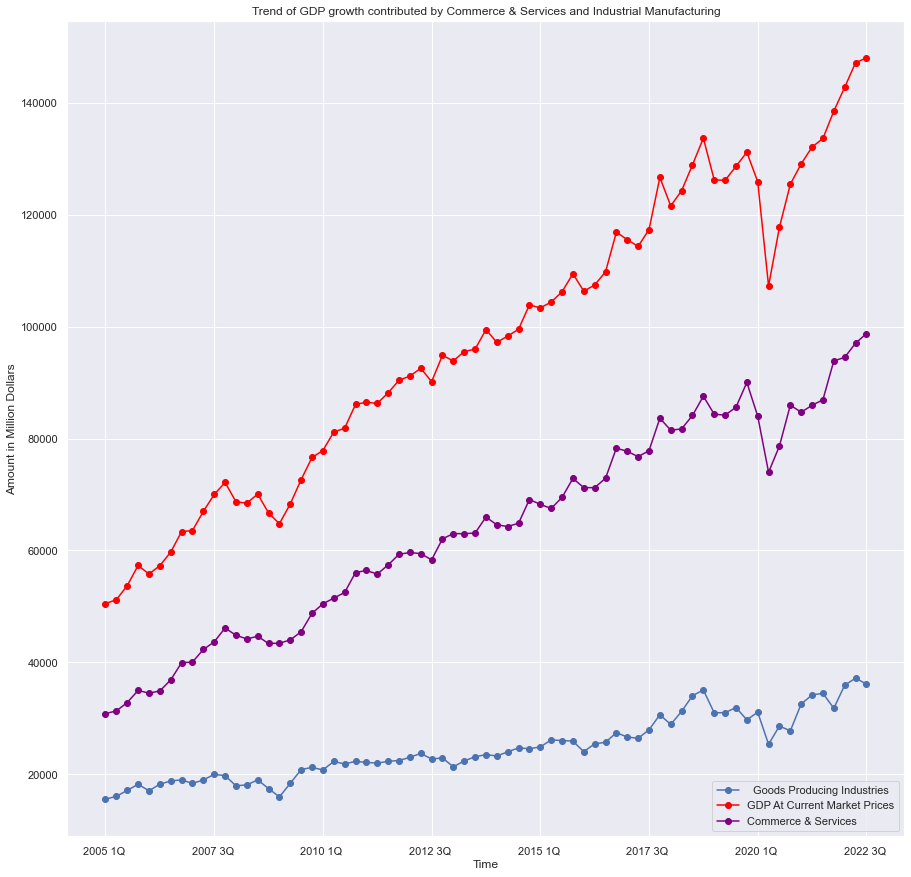

In [925]:
fig3, ax = plt.subplots(figsize = (15,15))
GDP_SG['  Goods Producing Industries'].plot(ax=ax,marker = 'o')
GDP_SG['GDP At Current Market Prices'].plot(ax=ax, color = 'red',marker = 'o')
GDP_SG['  Services Producing Industries'].plot(ax=ax, color = 'purple',label='Commerce & Services',marker = 'o')
ax.legend(loc=4)
ax.set_xlabel('Time')
ax.set_ylabel('Amount in Million Dollars')
ax.set_title('Trend of GDP growth contributed by Commerce & Services and Industrial Manufacturing')
fig3.set_facecolor('White')

### Illustrating the increase of electricity demand of above key sectors 

C:\Users\USER\AppData\Local\Temp\ipykernel_9500\2011373775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manufacturing_energy_load.replace(10230.7,20461.4,inplace=True) #for 2022, only data for first half of the year is available. It is assumed here that the electricity consumed in the 2nd half will be same as the first half
C:\Users\USER\AppData\Local\Temp\ipykernel_9500\2011373775.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_ecommerce_energy_load.replace(10259.1,20518.2,inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_9500\2011373775.py:12: SettingWithCopyWarning: 
A value is trying to be

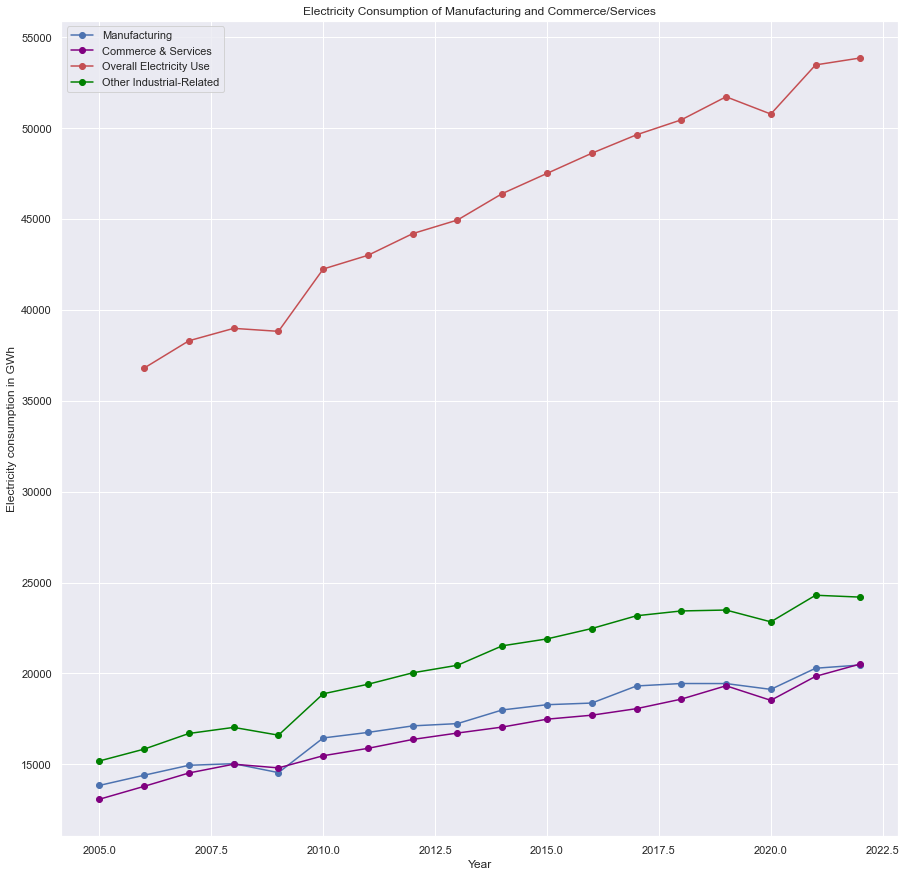

In [926]:
manufacturing_energy_load = industrial_energy_load.loc[(industrial_energy_load['sub_sector']=='Manufacturing')]
manufacturing_energy_load.replace(10230.7,20461.4,inplace=True) #for 2022, only data for first half of the year is available. It is assumed here that the electricity consumed in the 2nd half will be same as the first half

other_industrial_energy_load = industrial_energy_load.loc[(industrial_energy_load['sub_sector']!='Manufacturing')]
other_industrial_annual_use = other_industrial_energy_load.groupby('year').sum()
other_industrial_annual_use.reset_index(inplace=True)
other_industrial_annual_use.replace(12098.9,24197.8,inplace=True)

retail_ecommerce_energy_load= commerce_service_energy_load.loc[(commerce_service_energy_load['sub_sector']=='Commerce and Services-related')]
retail_ecommerce_energy_load.replace(10259.1,20518.2,inplace=True)

overall_energy_load.replace(26933,53866,inplace=True)

fig4, ax = plt.subplots(figsize=(15,15))
manufacturing_energy_load.plot(x='year',y='consumption_GWh',ax=ax,color='b',marker='o',label='Manufacturing')
retail_ecommerce_energy_load.plot(x='year',y='consumption_GWh',ax=ax,color='purple',marker='o',label='Commerce & Services')
overall_energy_load.plot(x='year',y='consumption_GWh',color='r',ax=ax,marker='o',label='Overall Electricity Use')
other_industrial_annual_use.plot(x='year',y='consumption_GWh',color='green',ax=ax,marker='o',label='Other Industrial-Related')

ax.set_xlabel('Year')
ax.set_ylabel('Electricity consumption in GWh')
ax.set_title('Electricity Consumption of Manufacturing and Commerce/Services')
fig4.set_facecolor('White')


### Illustrating the trend between median income of Singaporean residents and household electricity consumption

In [549]:
median_income = pd.read_excel('Average Income of SG Residents (MOM).xlsx')
median_income_2022 = {'Year':2022,'Median Income':5070}
median_income = median_income.append(median_income_2022,ignore_index=True,)
median_income

C:\Users\USER\AppData\Local\Temp\ipykernel_9500\3513865729.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_income = median_income.append(median_income_2022,ignore_index=True,)


,Year,Median Income
0,2006,2449
1,2007,2543
2,2008,2897
3,2009,2927
4,2010,3000
5,2011,3249
6,2012,3480
7,2013,3705
8,2014,3770
9,2015,3949


In [171]:
households_by_floor_area = pd.read_excel("Resident Households by Floor Area Size.xlsx")
households_by_floor_area = households_by_floor_area.T
new_header = households_by_floor_area.iloc[0]
households_by_floor_area = households_by_floor_area[1:]
households_by_floor_area.columns = new_header
households_by_floor_area.rename({'Data Series':'Year'},inplace=True)
households_by_floor_area = households_by_floor_area[::-1]
households_by_floor_area


Unnamed: 0,Data Series,<60 Sq M,61-80 Sq M,81-100 Sq M,101-120 Sq M,>120 Sq M
Unnamed: 11,2011,84000,192700,240900,302100,318600
Unnamed: 10,2012,85000,178700,246600,311700,318700
Unnamed: 9,2013,92900,182200,258100,308200,325800
Unnamed: 8,2014,94100,185000,266500,317400,332100
Unnamed: 7,2015,104600,189700,276700,316500,331700
Unnamed: 6,2016,109200,202200,299100,325500,322800
Unnamed: 5,2017,114000,203100,307000,332600,328600
Unnamed: 4,2018,121700,210500,312800,344300,330700
Unnamed: 3,2019,124500,218400,336200,351400,338100
Unnamed: 2,2020,131400,221200,334800,347000,332500


c:\Users\USER\anaconda3\envs\DS102\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\USER\AppData\Local\Temp\ipykernel_9500\2342816484.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  households_energy_load.replace(4023.4,8046.8,inplace=True)


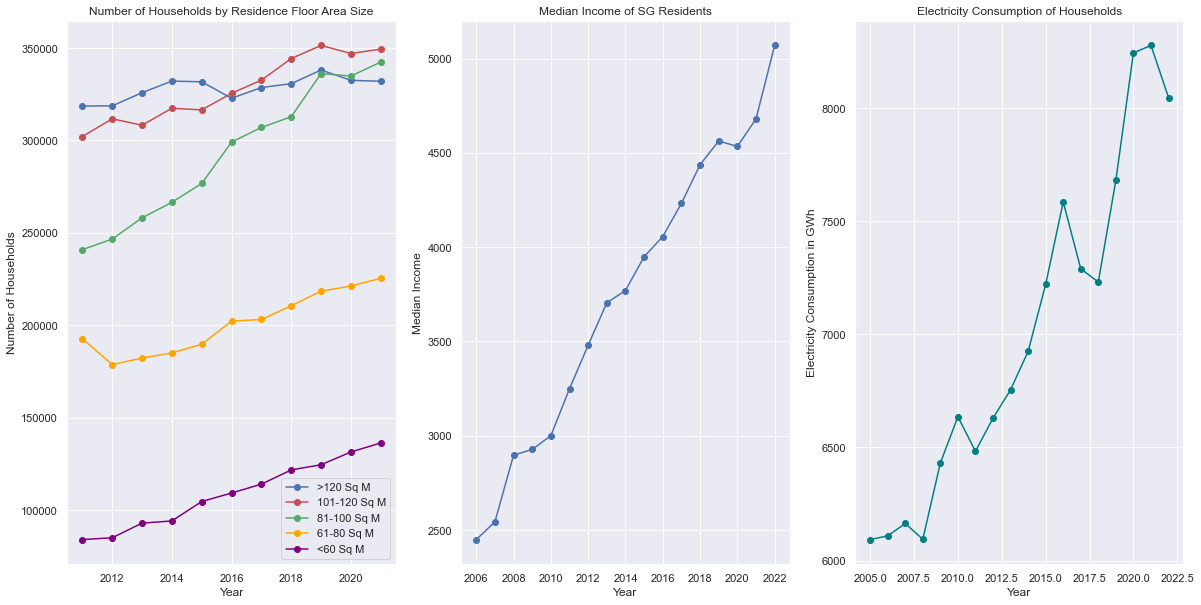

In [943]:
fig5, [ax0,ax1,ax2] = plt.subplots(nrows=1,ncols=3,figsize=(20,10))
households_by_floor_area.plot(x='Data Series',y = '>120 Sq M', color = 'b',marker = 'o',ax=ax0)
households_by_floor_area.plot(x='Data Series',y = '101-120 Sq M', color = 'r',marker = 'o',ax=ax0)
households_by_floor_area.plot(x='Data Series',y = '81-100 Sq M', color = 'g',marker = 'o',ax=ax0)
households_by_floor_area.plot(x='Data Series',y = '61-80 Sq M', color = 'orange',marker = 'o',ax=ax0)
households_by_floor_area.plot(x='Data Series',y = '<60 Sq M', color = 'purple',marker = 'o',ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('Number of Households')
ax0.set_title('Number of Households by Residence Floor Area Size')
ax0.legend(loc=4)

median_income.plot(x='Year',y='Median Income', marker = 'o',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Median Income')
ax1.get_legend().remove()
ax1.set_title('Median Income of SG Residents')

households_energy_load.replace(4023.4,8046.8,inplace=True)
households_energy_load.plot(x='year',y='consumption_GWh',marker = 'o',ax=ax2,color='teal')
ax2.set_ylabel('Electricity Consumption in GWh')
ax2.set_xlabel('Year')
ax2.set_title('Electricity Consumption of Households')
ax2.get_legend().remove()
fig5.set_facecolor('White')

### Building a predictive model 

##### We have identified growth in manufacturing sector, growth in commerce & services sector and increasing population income as key drivers of electricity demand. Now we build a model to predict how these parameters will be in 2023 and use it to forecast how electricity demand will be in 2023

##### We will start to predict manufacturing growth via GDP contribution

In [195]:
# Starting with manufacturing growth using the GDP contributed by manufacturing industry
annual_GDP = pd.read_excel("Annual GDP_SG.xlsx")
annual_GDP = annual_GDP.T
new_header_annual_GDP = annual_GDP.iloc[0]
annual_GDP = annual_GDP[1:]
annual_GDP.columns = new_header_annual_GDP
annual_GDP = annual_GDP[::-1]
annual_GDP

Data Series,GDP At Current Market Prices,Goods Producing Industries,Manufacturing,Construction,Utilities,Other Goods Industries,Services Producing Industries,Wholesale & Retail Trade,Wholesale Trade,Retail Trade,...,Information & Communications,Finance & Insurance,"Real Estate, Professional Services And Administrative & Support Services",Real Estate,Professional Services,Administrative & Support Services,Other Services Industries,Ownership Of Dwellings,Gross Value Added At Basic Prices,Add: Taxes On Products
2005,212723.0,66928.4,57598.5,6010.7,3202.1,117.1,129980.6,34655.5,30070.2,4585.3,...,8132.6,19680.3,22014.8,6728.7,10516.1,4770.0,20818.3,6317.8,203226.8,9496.2
2006,236158.8,73075.0,62766.3,6485.3,3708.0,115.4,146200.2,42056.0,37208.8,4847.2,...,8573.9,23508.5,24372.9,7105.4,11876.7,5390.8,22543.0,7012.2,226287.4,9871.4
2007,272697.6,77087.9,64963.8,8095.8,3911.4,116.9,172146.6,49097.7,43900.3,5197.4,...,9281.2,29568.6,30506.2,9360.7,14479.1,6666.4,24185.3,7943.3,257177.8,15519.8
2008,273941.6,72476.1,56392.7,11971.2,3998.7,113.5,177067.3,45086.1,39740.0,5346.1,...,9765.6,30190.0,35547.8,11362.8,16329.7,7855.3,25945.8,10166.2,259709.6,14232.0
2009,282394.5,76407.5,57250.9,14989.9,4051.8,114.9,181693.7,50395.9,44979.3,5416.6,...,10699.0,31589.8,35617.1,11027.5,16662.0,7927.6,26966.1,10351.7,268452.9,13941.6
2010,326980.1,87212.2,67926.3,14402.7,4765.0,118.2,210487.7,59177.5,53525.7,5651.8,...,11557.1,33987.9,41994.8,14034.8,18280.7,9679.3,32433.5,11347.1,309047.0,17933.1
2011,351367.9,88875.7,68806.8,14837.1,5110.2,121.6,228920.2,68009.6,61678.4,6331.2,...,12792.4,35298.4,47535.9,16127.2,19672.5,11736.2,35896.8,13604.9,331400.8,19967.1
2012,368770.5,92397.2,70497.2,16422.7,5354.6,122.7,239471.7,67637.8,61105.9,6531.9,...,14011.6,37722.1,50982.6,17078.0,20982.3,12922.3,37567.1,15749.3,347618.2,21152.3
2013,384870.3,90356.4,67885.0,17119.7,5219.4,132.3,255092.1,68495.3,61886.9,6608.4,...,15137.3,42888.3,55306.0,19243.2,21671.4,14391.4,40300.2,17251.0,362699.5,22170.8
2014,398947.9,96557.6,71809.7,19179.9,5430.2,137.8,262844.0,64724.5,57829.3,6895.2,...,16196.1,45966.4,57533.0,18962.7,22104.8,16465.5,42665.0,17797.2,377198.8,21749.1


In [202]:
manufacturing_GDP = annual_GDP['  Goods Producing Industries']
manufacturing_GDP

2005      66928.4
2006      73075.0
2007      77087.9
2008      72476.1
2009      76407.5
2010      87212.2
2011      88875.7
2012      92397.2
2013      90356.4
2014      96557.6
2015     102984.3
2016     102634.5
2017     111655.9
2018     129248.4
2019     123654.4
2020     112820.7
2021     132999.6
Name:   Goods Producing Industries, dtype: object

In [930]:
manufacturing_GDP = [66928.4,73075.0,77087.9,72476.1,76407.5,87212.2,88875.7,92397.2,90356.4,96557.6,102984.3,102634.5,111655.9,129248.4,123654.4,112820.7,132999.6,145590]
manufacturing_energy_load['GDP Generation'] = manufacturing_GDP
manufacturing_energy_load

#for GDP generated, data for 2022 is only available up till Q3. 2022 Q4 GDP will be assumed to be the average of Q1-Q3 2022

C:\Users\USER\AppData\Local\Temp\ipykernel_9500\3982518446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manufacturing_energy_load['GDP Generation'] = manufacturing_GDP


,year,sector,sub_sector,consumption_GWh,GDP Generation
11,2005,Industrial-related,Manufacturing,13836.1,66928.4
27,2006,Industrial-related,Manufacturing,14397.2,73075.0
43,2007,Industrial-related,Manufacturing,14943.2,77087.9
59,2008,Industrial-related,Manufacturing,15032.7,72476.1
75,2009,Industrial-related,Manufacturing,14539.7,76407.5
91,2010,Industrial-related,Manufacturing,16448.0,87212.2
107,2011,Industrial-related,Manufacturing,16752.4,88875.7
123,2012,Industrial-related,Manufacturing,17112.4,92397.2
139,2013,Industrial-related,Manufacturing,17237.4,90356.4
155,2014,Industrial-related,Manufacturing,17989.0,96557.6


In [285]:
import math
from sklearn.preprocessing import MinMaxScaler 
manufacturing_GDP = manufacturing_energy_load['GDP Generation'].values
training_data_len_manufacturing_GDP = math.ceil(len(manufacturing_GDP)*0.8)
training_data_len_manufacturing_GDP

15

In [286]:
manufacturing_GDP = manufacturing_GDP.reshape(-1,1)

In [411]:
scaler = MinMaxScaler()
scaled_manufacturing_GDP = scaler.fit_transform(manufacturing_GDP.reshape(-1,1))     #normalizing the data as data does not follow a Gaussian distribution
training_data_manufacturing_GDP = manufacturing_GDP[0:training_data_len_manufacturing_GDP,:]       #80% of the scaled manufacturing GDP data to be used as the training data

X_train_manufacturing_GDP = []
Y_train_manufacturing_GDP = []

for i in range(3,len(training_data_manufacturing_GDP)):
    X_train_manufacturing_GDP.append(training_data_manufacturing_GDP[i-3:i,0])     #x_train data consists of the GDP generated by manufacturing of the past 3 years
    Y_train_manufacturing_GDP.append(training_data_manufacturing_GDP[i,0])          #y_train data (label data) consists of the GDP generated by manufacturing of the next corresponding 10 years


X_train_manufacturing_GDP, Y_train_manufacturing_GDP = np.array(X_train_manufacturing_GDP), np.array(Y_train_manufacturing_GDP)

In [412]:
X_train_manufacturing_GDP.shape

(12, 3)

In [413]:
X_train_manufacturing_GDP = np.reshape(X_train_manufacturing_GDP, (12,3,1))

In [414]:
test_data_manufacturing_GDP = scaled_manufacturing_GDP[training_data_len_manufacturing_GDP-3:,:]

X_test_manufacturing_GDP = []
Y_test_manufacturing_GDP = manufacturing_GDP[training_data_len_manufacturing_GDP:]

for i in range(3, len(test_data_manufacturing_GDP)):
    X_test_manufacturing_GDP.append(test_data_manufacturing_GDP[i-3:i,0])     
    

X_test_manufacturing_GDP, Y_test_manufacturing_GDP = np.array(X_test_manufacturing_GDP), np.array(Y_test_manufacturing_GDP)

In [415]:
X_test_manufacturing_GDP.shape

(3, 3)

In [416]:
Y_test_manufacturing_GDP.shape

(3, 1)

In [417]:
X_test_manufacturing_GDP = np.reshape(X_test_manufacturing_GDP,(3,3,1))

In [312]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import LSTM
from keras.models import Sequential

In [441]:
model = keras.Sequential()      #sequential model is used as we are working with sequential data and we are trying to predict future sequential data
model.add(LSTM(30, return_sequences = True, input_shape = (3,1)))
model.add(LSTM(30, return_sequences = False))
model.add(layers.Dense(10))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_72 (LSTM)              (None, 3, 30)             3840      
                                                                 
 lstm_73 (LSTM)              (None, 30)                7320      
                                                                 
 dense_72 (Dense)            (None, 10)                310       
                                                                 
 dense_73 (Dense)            (None, 1)                 11        
                                                                 
Total params: 11,481
Trainable params: 11,481
Non-trainable params: 0
_________________________________________________________________


In [442]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train_manufacturing_GDP, Y_train_manufacturing_GDP, batch_size =1, epochs=3) 

Epoch 1/3
12/12 [==============================] - 4s 5ms/step - loss: 9851849728.0000
Epoch 2/3
12/12 [==============================] - 0s 5ms/step - loss: 9851728896.0000
Epoch 3/3
12/12 [==============================] - 0s 6ms/step - loss: 9851540480.0000


In [443]:
from sklearn.metrics import mean_squared_error

predicted_manufacturing_GDP = model.predict(X_test_manufacturing_GDP)
predicted_manufacturing_GDP_unscaled = scaler.inverse_transform(predicted_manufacturing_GDP)
RMSE = np.sqrt(mean_squared_error(Y_test_manufacturing_GDP, predicted_manufacturing_GDP_unscaled))
RMSE

1/1 [==============================] - 1s 1s/step


35453.176421935896

In [447]:
mean_manufacturing_GDP = manufacturing_energy_load['GDP Generation'].mean()
percentage_error_manufacturing_GDP = RMSE/mean_manufacturing_GDP*100
percentage_error_manufacturing_GDP

35.79197129152437

In [445]:
last_3years_manufacturing_GDP = Y_test_manufacturing_GDP[0:]
last_3years_manufacturing_GDP = last_3years_manufacturing_GDP.reshape(1,-1)
last_3years_manufacturing_GDP_list = list(last_3years_manufacturing_GDP)
last_3years_manufacturing_GDP.shape

(1, 3)

In [449]:
predicted_output_manufacturing_GDP = []           
last_3years_manufacturing_GDP = last_3years_manufacturing_GDP.reshape((1,3,1))         
future_predict_manufacturing_GDP = model.predict(last_3years_manufacturing_GDP,verbose=1)
last_3years_manufacturing_GDP_list.extend(future_predict_manufacturing_GDP[0].tolist())         
predicted_output_manufacturing_GDP.extend(future_predict_manufacturing_GDP.tolist())  
predicted_output_manufacturing_GDP = scaler.inverse_transform(predicted_output_manufacturing_GDP)
predicted_manufacturing_GDP = predicted_output_manufacturing_GDP-((percentage_error_manufacturing_GDP/100)*predicted_output_manufacturing_GDP)

print(predicted_manufacturing_GDP)

#predicted GDP attributed to manufacturing in 2023

1/1 [==============================] - 0s 63ms/step
[[173358.25838196]]


##### Next will be Commerce/Services Sector

In [463]:
commerce_services_GDP = annual_GDP['  Services Producing Industries']
commerce_services_GDP = commerce_services_GDP.values.tolist()
commerce_services_GDP.append(387078.8)
#for GDP generated, data for 2022 is only available up till Q3. 2022 Q4 GDP will be assumed to be the average of Q1-Q3 2022

In [844]:
commerce_services_energy_and_GDP = commerce_service_energy_load.loc[commerce_service_energy_load['sub_sector']=='Commerce and Services-related']
commerce_services_energy_and_GDP['GDP Generation'] = commerce_services_GDP
commerce_services_energy_and_GDP

C:\Users\USER\AppData\Local\Temp\ipykernel_9500\3643665094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commerce_services_energy_and_GDP['GDP Generation'] = commerce_services_GDP


,year,sector,sub_sector,consumption_GWh,GDP Generation
1,2005,Commerce and Services-related,Commerce and Services-related,13075.6,129980.6
17,2006,Commerce and Services-related,Commerce and Services-related,13785.7,146200.2
33,2007,Commerce and Services-related,Commerce and Services-related,14520.6,172146.6
49,2008,Commerce and Services-related,Commerce and Services-related,15004.6,177067.3
65,2009,Commerce and Services-related,Commerce and Services-related,14800.1,181693.7
81,2010,Commerce and Services-related,Commerce and Services-related,15469.7,210487.7
97,2011,Commerce and Services-related,Commerce and Services-related,15876.3,228920.2
113,2012,Commerce and Services-related,Commerce and Services-related,16366.1,239471.7
129,2013,Commerce and Services-related,Commerce and Services-related,16718.6,255092.1
145,2014,Commerce and Services-related,Commerce and Services-related,17046.6,262844.0


In [472]:
commerce_services_GDP = commerce_services_energy_and_GDP['GDP Generation'].values
training_data_len_commerce_services_GDP = math.ceil(len(commerce_services_GDP)*0.8)


In [473]:
commerce_services_GDP = commerce_services_GDP.reshape(-1,1)

In [474]:
scaled_commerce_services_GDP = scaler.fit_transform(commerce_services_GDP.reshape(-1,1))     #normalizing the data as data does not follow a Gaussian distribution
training_data_commerce_services_GDP = commerce_services_GDP[0:training_data_len_commerce_services_GDP,:]       #80% of the scaled commerce/services GDP data to be used as the training data

X_train_commerce_services_GDP = []
Y_train_commerce_services_GDP = []

for i in range(3,len(training_data_commerce_services_GDP)):
    X_train_commerce_services_GDP.append(training_data_commerce_services_GDP[i-3:i,0])     #x_train data consists of the GDP generated by commerce/services of the past 3 years
    Y_train_commerce_services_GDP.append(training_data_commerce_services_GDP[i,0])          #y_train data (label data) consists of the GDP generated by commerce/services of the next corresponding 10 years


X_train_commerce_services_GDP,  Y_train_commerce_services_GDP = np.array(X_train_commerce_services_GDP), np.array(Y_train_commerce_services_GDP)

In [476]:
X_train_commerce_services_GDP.shape

(12, 3)

In [477]:
X_train_commerce_services_GDP = np.reshape(X_train_commerce_services_GDP,(12,3,1))

In [478]:
test_data_commerce_services_GDP = scaled_commerce_services_GDP[training_data_len_commerce_services_GDP-3:,:]

X_test_commerce_services_GDP = []
Y_test_commerce_services_GDP = commerce_services_GDP[training_data_len_commerce_services_GDP:]

for i in range(3, len(test_data_commerce_services_GDP)):
    X_test_commerce_services_GDP.append(test_data_commerce_services_GDP[i-3:i,0])     
    

X_test_commerce_services_GDP, Y_test_commerce_services_GDP = np.array(X_test_commerce_services_GDP), np.array(Y_test_commerce_services_GDP)

In [479]:
X_test_commerce_services_GDP.shape

(3, 3)

In [480]:
X_test_commerce_services_GDP = np.reshape(X_test_commerce_services_GDP,(3,3,1))

In [524]:
model_commerce_services_GDP = keras.Sequential()      #sequential model is used as we are working with sequential data and we are trying to predict future sequential data
model_commerce_services_GDP.add(LSTM(30, return_sequences = True, input_shape = (3,1)))
model_commerce_services_GDP.add(LSTM(30, return_sequences = False))
model_commerce_services_GDP.add(layers.Dense(10))
model_commerce_services_GDP.add(layers.Dense(1))
model_commerce_services_GDP.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_86 (LSTM)              (None, 3, 30)             3840      
                                                                 
 lstm_87 (LSTM)              (None, 30)                7320      
                                                                 
 dense_86 (Dense)            (None, 10)                310       
                                                                 
 dense_87 (Dense)            (None, 1)                 11        
                                                                 
Total params: 11,481
Trainable params: 11,481
Non-trainable params: 0
_________________________________________________________________


In [525]:
model_commerce_services_GDP.compile(optimizer = 'adam', loss = 'mean_squared_error')
model_commerce_services_GDP.fit(X_train_commerce_services_GDP, Y_train_commerce_services_GDP, batch_size =1, epochs=3) 

Epoch 1/3
12/12 [==============================] - 5s 5ms/step - loss: 70550290432.0000
Epoch 2/3
12/12 [==============================] - 0s 9ms/step - loss: 70550028288.0000
Epoch 3/3
12/12 [==============================] - 0s 10ms/step - loss: 70549651456.0000


In [526]:
predicted_commerce_services_GDP = model_commerce_services_GDP.predict(X_test_commerce_services_GDP)
predicted_commerce_services_GDP_unscaled = scaler.inverse_transform(predicted_commerce_services_GDP)
RMSE_commerce_services_GDP = np.sqrt(mean_squared_error(Y_test_commerce_services_GDP, predicted_commerce_services_GDP_unscaled))
RMSE_commerce_services_GDP

1/1 [==============================] - 1s 1s/step


108844.59634572142

In [527]:
mean_commerce_services_GDP = commerce_services_energy_and_GDP['GDP Generation'].mean()
percentage_error_commerce_services_GDP = RMSE_commerce_services_GDP/mean_commerce_services_GDP*100
percentage_error_commerce_services_GDP

42.298244310600154

In [528]:
#Now to try to predict what will be the GDP contributed by commerce/services sector in 2023, indicative of the growth of this sector next year.
last_3years_commerce_services_GDP = Y_test_commerce_services_GDP[0:]
last_3years_commerce_services_GDP = last_3years_commerce_services_GDP.reshape(1,-1)
last_3years_commerce_services_GDP_list = list(last_3years_commerce_services_GDP)
last_3years_commerce_services_GDP.shape

(1, 3)

In [529]:
predicted_output_commerce_services_GDP = []           
last_3years_commerce_services_GDP = last_3years_commerce_services_GDP.reshape((1,3,1))          
future_predict_commerce_services_GDP = model_commerce_services_GDP.predict(last_3years_commerce_services_GDP,verbose=1)
last_3years_commerce_services_GDP_list.extend(future_predict_commerce_services_GDP[0].tolist())         
predicted_output_commerce_services_GDP.extend(future_predict_commerce_services_GDP.tolist())  
predicted_output_commerce_services_GDP = scaler.inverse_transform(predicted_output_commerce_services_GDP)
predicted_commerce_services_GDP = predicted_output_commerce_services_GDP-((percentage_error_commerce_services_GDP/100)*predicted_output_commerce_services_GDP)

print(predicted_commerce_services_GDP)
#predicted commerce/services GDP in 2023

1/1 [==============================] - 0s 93ms/step
[[377119.39999773]]


##### Lastly, for average income of Singapore residents

In [550]:
median_income_SG_residents = median_income['Median Income'].values
training_data_len_median_income = math.ceil(len(median_income_SG_residents)*0.8)

In [551]:
training_data_len_median_income

14

In [552]:
median_income_SG_residents = median_income_SG_residents.reshape(-1,1)

In [554]:
scaled_median_income = scaler.fit_transform(median_income_SG_residents.reshape(-1,1))     #normalizing the data as data does not follow a Gaussian distribution
training_data_median_income = median_income_SG_residents[0:training_data_len_median_income,:]       #80% of the scaled median income data to be used as the training data

X_train_median_income = []
Y_train_median_income = []

for i in range(3,len(training_data_median_income)):
    X_train_median_income.append(training_data_median_income[i-3:i,0])     #x_train data consists of the median income of the past 3 years
    Y_train_median_income.append(training_data_median_income[i,0])          #y_train data (label data) consists of the median income of the next corresponding 10 years


X_train_median_income,  Y_train_median_income = np.array(X_train_median_income), np.array(Y_train_median_income)

In [555]:
X_train_median_income.shape

(11, 3)

In [556]:
X_train_median_income = np.reshape(X_train_median_income,(11,3,1))

In [582]:
test_data_median_income = scaled_median_income[training_data_len_median_income-3:,:]

X_test_median_income = []
Y_test_median_income = median_income_SG_residents[training_data_len_median_income:]

for i in range(3, len(test_data_median_income)):
    X_test_median_income.append(test_data_commerce_services_GDP[i-3:i,0])     
    

X_test_median_income, Y_test_median_income = np.array(X_test_median_income), np.array(Y_test_median_income)


In [571]:
X_test_median_income.shape

(3, 3)

In [586]:
X_test_median_income = np.reshape(X_test_median_income,(3,3))

In [648]:
model_median_income = keras.Sequential()      #sequential model is used as we are working with sequential data and we are trying to predict future sequential data
model_median_income.add(LSTM(20, return_sequences = True, input_shape = (3,1)))
model_median_income.add(LSTM(20, return_sequences = False))
model_median_income.add(layers.Dense(5))
model_median_income.add(layers.Dense(1))
model_median_income.summary()

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_104 (LSTM)             (None, 3, 20)             1760      
                                                                 
 lstm_105 (LSTM)             (None, 20)                3280      
                                                                 
 dense_104 (Dense)           (None, 5)                 105       
                                                                 
 dense_105 (Dense)           (None, 1)                 6         
                                                                 
Total params: 5,151
Trainable params: 5,151
Non-trainable params: 0
_________________________________________________________________


In [649]:
model_median_income.compile(optimizer = 'adam', loss = 'mean_squared_error')
model_median_income.fit(X_train_median_income, Y_train_median_income, batch_size =1, epochs=3) 

Epoch 1/3
11/11 [==============================] - 8s 8ms/step - loss: 14417171.0000
Epoch 2/3
11/11 [==============================] - 0s 8ms/step - loss: 14412899.0000
Epoch 3/3
11/11 [==============================] - 0s 10ms/step - loss: 14407625.0000


In [650]:
predicted_median_income = model_median_income.predict(X_test_median_income)
predicted_median_income_unscaled = scaler.inverse_transform(predicted_median_income)
RMSE_median_income = np.sqrt(mean_squared_error(Y_test_median_income, predicted_median_income_unscaled))
RMSE_median_income


1/1 [==============================] - 2s 2s/step


1472.6424396142286

In [651]:
avg_median_income = median_income['Median Income'].mean()
avg_median_income
percentage_error_median_income = RMSE_median_income/avg_median_income*100
percentage_error_median_income

39.399634052724835

In [646]:
#predicting the median income in 2023
last_3years_median_income = Y_test_commerce_services_GDP[0:]
last_3years_median_income = last_3years_median_income.reshape(1,-1)
last_3years_median_income_list = list(last_3years_median_income)
last_3years_median_income.shape

(1, 3)

In [652]:
predicted_output_median_income = []           
last_3years_median_income = last_3years_median_income.reshape((1,3,1))      #reshaping the last 3 years of income data into a 3D array to feed into LSTM model      
future_predict_median_income = model_median_income.predict(last_3years_median_income,verbose=1)
last_3years_median_income_list.extend(future_predict_median_income[0].tolist())      #adding the predicted output into the median income list 
predicted_output_median_income.extend(future_predict_median_income.tolist())    #adding the predicted output into the predicted output list
predicted_output_median_income = scaler.inverse_transform(predicted_output_median_income)
predicted_median_income_2023 = predicted_output_median_income-((percentage_error_median_income/100)*predicted_output_median_income)

print(predicted_median_income_2023)
#predicted median income in 2023

1/1 [==============================] - 2s 2s/step
[[5179.88480091]]


### Now we have predicted values of key parameters in 2023, we can feed the predicted data into another model to predict the electricity demand in 2023

#### Gathering data of key parameters and total electricity consumption into a single dataframe

In [845]:
overall_energy_load['Manufacturing GDP'] = manufacturing_energy_load['GDP Generation'].values
overall_energy_load['Commerce/Services GDP'] = commerce_services_GDP
overall_energy_load.drop(index=288,axis=0,inplace=True)
overall_energy_load['Median Income'] = median_income['Median Income'].values
overall_energy_load.replace(26933,53866,inplace=True)      #only data up till 1H 2022 is available, 2H 2022 will be assumed to be the same as 1H 2022. Electricity consumed in 2022 will be assumed to be double that consumed in 1H 2022.
overall_energy_load

C:\Users\USER\AppData\Local\Temp\ipykernel_9500\347893150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_energy_load['Manufacturing GDP'] = manufacturing_energy_load['GDP Generation'].values
C:\Users\USER\AppData\Local\Temp\ipykernel_9500\347893150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_energy_load['Commerce/Services GDP'] = commerce_services_GDP
C:\Users\USER\AppData\Local\Temp\ipykernel_9500\347893150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

,year,sector,sub_sector,consumption_GWh,Manufacturing GDP,Commerce/Services GDP,Median Income
289,2006,Overall,Overall,36801.8,73075.0,146200.2,2449
290,2007,Overall,Overall,38304.9,77087.9,172146.6,2543
291,2008,Overall,Overall,38986.9,72476.1,177067.3,2897
292,2009,Overall,Overall,38822.9,76407.5,181693.7,2927
293,2010,Overall,Overall,42251.8,87212.2,210487.7,3000
294,2011,Overall,Overall,43007.1,88875.7,228920.2,3249
295,2012,Overall,Overall,44200.7,92397.2,239471.7,3480
296,2013,Overall,Overall,44948.8,90356.4,255092.1,3705
297,2014,Overall,Overall,46403.0,96557.6,262844.0,3770
298,2015,Overall,Overall,47513.9,102984.3,278103.0,3949


#### Separating the features and labels + train-test split

In [730]:
from sklearn.model_selection import train_test_split
X = overall_energy_load.drop(columns = ['sector','sub_sector','year', 'consumption_GWh'])
Y = overall_energy_load['consumption_GWh']

X_train_electricity_demand , X_test_electricity_demand, Y_train_electricity_demand, Y_test_electricity_demand = train_test_split(X,Y, test_size=0.2, random_state=555)

In [723]:
X_train_electricity_demand.shape

(13, 3)

In [724]:
X_test_electricity_demand.shape

(4, 3)

In [731]:
Y

289    36801.8
290    38304.9
291    38986.9
292    38822.9
293    42251.8
294    43007.1
295    44200.7
296    44948.8
297    46403.0
298    47513.9
299    48623.0
300    49637.9
301    50460.9
302    51730.1
303    50779.6
304    53483.5
305    53866.0
Name: consumption_GWh, dtype: float64

#### Using base linear regression to set the standard

In [879]:
from sklearn.linear_model import LinearRegression
model_linearregression =  LinearRegression()
model_linearregression.fit(X_train_electricity_demand,Y_train_electricity_demand)
linear_regression_pred = model_linearregression.predict(X_test_electricity_demand)
actual_vs_pred_LR = pd.DataFrame({'Actual': Y_test_electricity_demand, 'Predicted': linear_regression_pred})
actual_vs_pred_LR

,Actual,Predicted
292,38822.9,39746.425439
300,49637.9,50062.171896
296,44948.8,45587.281929
305,53866.0,55398.346969


In [733]:
print(model_linearregression.intercept_)
print(model_linearregression.coef_)

24833.74888027687
[-0.02143175  0.06934103  1.34998135]


In [880]:
#Linear Regression model evaluation using RMSE
from sklearn import metrics

RMSE_linear_regression = np.sqrt(metrics.mean_squared_error(Y_test_electricity_demand, linear_regression_pred))
print(RMSE_linear_regression)
mean_electricity_demand = overall_energy_load['consumption_GWh'].mean()
percentage_error_LR = RMSE_linear_regression/mean_electricity_demand*100
print(percentage_error_LR)

973.2230326376903
2.1216091084847397


In [735]:
r2_LR = metrics.r2_score(Y_test_electricity_demand , linear_regression_pred)
r2_LR

0.9697008820931494

#### Let's try some Regularized LR models

In [902]:
#Lasso Regression
from sklearn.linear_model import Lasso
model_Lasso = Lasso(alpha= 0.5)
model_Lasso.fit(X_train_electricity_demand,Y_train_electricity_demand)
lasso_pred = model_Lasso.predict(X_test_electricity_demand)
actual_vs_pred_Lasso = pd.DataFrame({'Actual': Y_test_electricity_demand, 'Predicted': lasso_pred})
actual_vs_pred_Lasso

c:\Users\USER\anaconda3\envs\DS102\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.220e+06, tolerance: 3.579e+04
  model = cd_fast.enet_coordinate_descent(


,Actual,Predicted
292,38822.9,39746.425235
300,49637.9,50062.168757
296,44948.8,45587.276462
305,53866.0,55398.352341


In [903]:
RMSE_Lasso = np.sqrt(metrics.mean_squared_error(Y_test_electricity_demand, lasso_pred))
print(RMSE_Lasso)
percentage_error_Lasso = RMSE_Lasso/mean_electricity_demand*100
print(percentage_error_Lasso)

973.2238602727367
2.1216109127145972


In [908]:
# Ridge Regression
from sklearn.linear_model import Ridge 
model_Ridge = Ridge(alpha= 2)
model_Ridge.fit(X_train_electricity_demand,Y_train_electricity_demand)
ridge_pred = model_Ridge.predict(X_test_electricity_demand)
actual_vs_pred_Ridge = pd.DataFrame({'Actual': Y_test_electricity_demand, 'Predicted': ridge_pred})
actual_vs_pred_Ridge

,Actual,Predicted
292,38822.9,39746.421639
300,49637.9,50062.175549
296,44948.8,45587.281835
305,53866.0,55398.345177


In [909]:
RMSE_Ridge = np.sqrt(metrics.mean_squared_error(Y_test_electricity_demand, ridge_pred))
print(RMSE_Ridge)
percentage_error_Ridge = RMSE_Ridge/mean_electricity_demand*100
print(percentage_error_Ridge)

973.2218084128889
2.1216064396961865


#### Let's try XGBoost algorithm

In [904]:
import xgboost as xgb
model_xgb = xgb.sklearn.XGBRegressor(random_state = 123)
model_xgb.fit(X_train_electricity_demand,Y_train_electricity_demand)
xgb_pred = model_xgb.predict(X_test_electricity_demand)
actual_vs_pred_xgb = pd.DataFrame({'Actual': Y_test_electricity_demand, 'Predicted': xgb_pred})
actual_vs_pred_xgb

,Actual,Predicted
292,38822.9,38982.195312
300,49637.9,50383.070312
296,44948.8,43007.089844
305,53866.0,53483.488281


In [905]:
RMSE_xgb = np.sqrt(metrics.mean_squared_error(Y_test_electricity_demand,xgb_pred))
print(RMSE_xgb)
percentage_error_xgb = RMSE_xgb/mean_electricity_demand*100
print(percentage_error_xgb)

1060.3310022206872
2.3115029514078946


In [738]:
r2_xgb = metrics.r2_score(Y_test_electricity_demand , xgb_pred)
r2_xgb

0.9640343306520027

#### Let's try SVM

In [739]:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X_train_electricity_demand,Y_train_electricity_demand)
svr_pred = svr_model.predict(X_test_electricity_demand)
actual_vs_pred_svr = pd.DataFrame({'Actual': Y_test_electricity_demand, 'Predicted': svr_pred})
actual_vs_pred_svr

,Actual,Predicted
292,38822.9,46400.513032
300,49637.9,46404.727104
296,44948.8,46402.687936
305,53866.0,46405.880802


In [740]:
RMSE_svr = np.sqrt(metrics.mean_squared_error(Y_test_electricity_demand,svr_pred))
print(RMSE_svr)
percentage_error_svr = RMSE_svr/mean_electricity_demand*100
print(percentage_error_svr)

5604.480234866067
12.217668423226808


In [741]:
r2_svr= metrics.r2_score(Y_test_electricity_demand , svr_pred)
r2_svr

-0.004791405895304246

#### Seems like a simple Linear Regression model still performs slightly better. Now, to feed the predicted 2023 values of the different features into the a regularized LR model to predict the total electricity demand of 2023

In [920]:
manufacturing_GDP_2023 = predicted_manufacturing_GDP[0]
commerce_services_GDP_2023 =predicted_commerce_services_GDP[0]
median_income_2023 = predicted_median_income_2023[0]
df_electricity_demand_predictor = pd.DataFrame({'Manufacturing GDP':manufacturing_GDP_2023,'Commerce/Services GDP':commerce_services_GDP_2023,'Median Income':median_income_2023})     

predicted_electricity_demand_2023 = model_Lasso.predict(df_electricity_demand_predictor)
predicted_electricity_demand_2023 = predicted_electricity_demand_2023[0]
low_predicted_electricity_demand_2023 = round(predicted_electricity_demand_2023-RMSE_Lasso,0)   
high_predicted_electricity_demand_2023 = round(predicted_electricity_demand_2023+RMSE_Lasso,0)   
print (f'The predicted electricity demand of Singapore in 2023 is between {low_predicted_electricity_demand_2023} GWh & {high_predicted_electricity_demand_2023} GWh')



The predicted electricity demand of Singapore in 2023 is between 53288.0 GWh & 55234.0 GWh


In [921]:
predicted_electricity_demand_2023

54260.997811335925

In [922]:
overall_energy_load_2023 = overall_energy_load.copy(deep=True)
data_2023 = {'year':2023, 
            'sector':'Overall',
            'sub_sector':'Overall',
            'consumption_GWh':high_predicted_electricity_demand_2023,   #we will take the upper limit of the prediction range to visualize the prediction.
            'Manufacturing GDP':manufacturing_GDP_2023,
            'Commerce/Services GDP':commerce_services_GDP_2023,
            'Median Income':median_income_2023}

overall_energy_load_2023 = overall_energy_load_2023.append(data_2023,ignore_index=True)


C:\Users\USER\AppData\Local\Temp\ipykernel_9500\1495317239.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_energy_load_2023 = overall_energy_load_2023.append(data_2023,ignore_index=True)


In [923]:
show_prediction = overall_energy_load_2023.iloc[-2:]
show_prediction

,year,sector,sub_sector,consumption_GWh,Manufacturing GDP,Commerce/Services GDP,Median Income
16,2022,Overall,Overall,53866.0,145590.0,387078.8,5070
17,2023,Overall,Overall,55234.0,[173358.25838195984],[377119.3999977318],[5179.884800906284]


c:\Users\USER\anaconda3\envs\DS102\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


Text(0, 0.5, 'Electricity Consumption (GWh)')

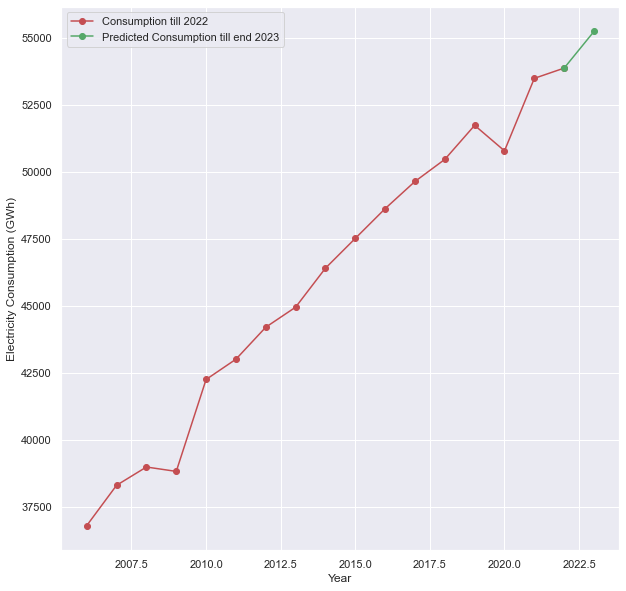

In [924]:
fig6, ax = plt.subplots(figsize = (10,10))
overall_energy_load.plot(x='year',y='consumption_GWh',ax=ax,color='r',marker='o',label = 'Consumption till 2022')
show_prediction.plot(x='year',y='consumption_GWh',ax=ax,color='g',marker='o',label = 'Predicted Consumption till end 2023')
ax.set_xlabel('Year')
ax.set_ylabel('Electricity Consumption (GWh)')


### Some Annex plots

c:\Users\USER\anaconda3\envs\DS102\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


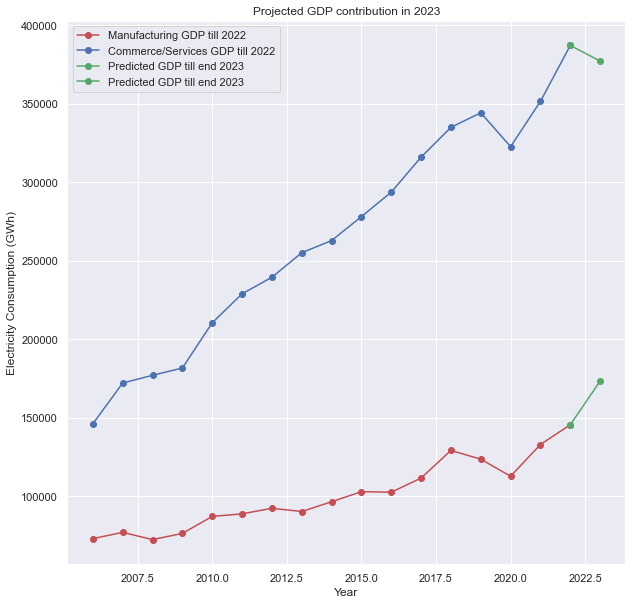

In [941]:
#predicted GDP growth of manufacturing & commerc/services sector in 2023
fig7, ax = plt.subplots(figsize = (10,10))
overall_energy_load.plot(x='year',y='Manufacturing GDP',ax=ax,color='r',marker='o',label = 'Manufacturing GDP till 2022')
overall_energy_load.plot(x='year',y='Commerce/Services GDP',ax=ax,color='b',marker='o',label = 'Commerce/Services GDP till 2022')
show_prediction.plot(x='year',y='Manufacturing GDP',ax=ax,color='g',marker='o',label = 'Predicted GDP till end 2023')
show_prediction.plot(x='year',y='Commerce/Services GDP',ax=ax,color='g',marker='o',label = 'Predicted GDP till end 2023')
ax.set_xlabel('Year')
ax.set_ylabel('Electricity Consumption (GWh)')
ax.set_title('Projected GDP contribution in 2023')
fig7.set_facecolor('white')

c:\Users\USER\anaconda3\envs\DS102\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


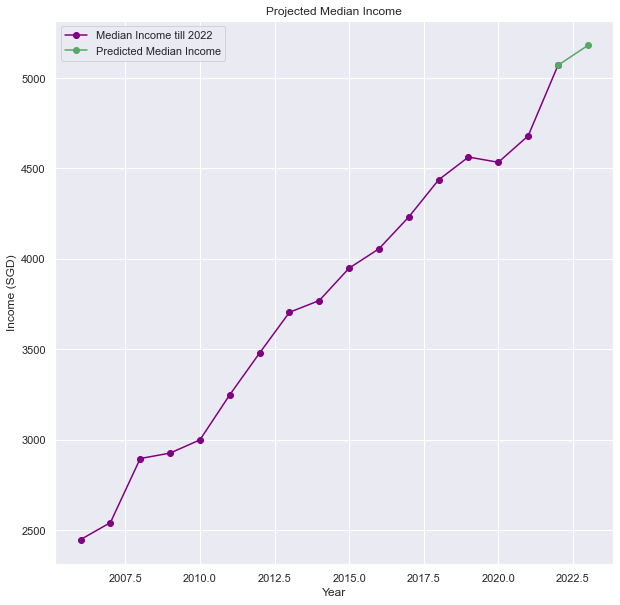

In [942]:
#predicted growth in median income in 2023
fig8, ax = plt.subplots(figsize = (10,10))
overall_energy_load.plot(x='year',y='Median Income',ax=ax,color='purple',marker='o',label = 'Median Income till 2022')
show_prediction.plot(x='year',y='Median Income',ax=ax,color='g',marker='o',label = 'Predicted Median Income')
ax.set_xlabel('Year')
ax.set_ylabel('Income (SGD)')
ax.set_title('Projected Median Income')
fig8.set_facecolor('White')